<a href="https://colab.research.google.com/github/mka-2000/Excelr-assignment/blob/main/SVM_Assignment(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Salary Datset
# We are given with the training and the testing dataset.


# First,we load the training dataset

  # TRAINING DATASET
  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [3]:
SD_train = pd.read_csv('SalaryData_Train.csv')

In [4]:
SD_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
SD_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
# Checking for null values

SD_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
# No null values.Proceeding Further

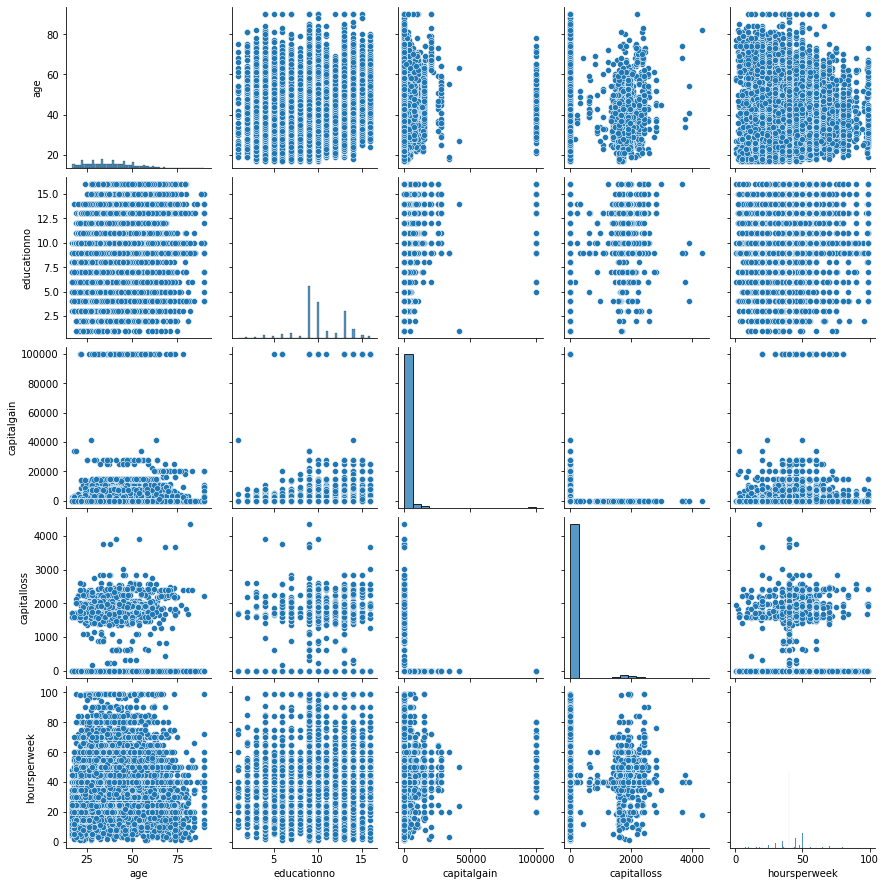

In [8]:
sns.pairplot(SD_train)

In [9]:
salary_train = SD_train.drop_duplicates()
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
# As we have some labelled data.We need to do Label Encoding for those columns


In [11]:
# Label Encoding

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
salary_train['workclass'] = label_encoder.fit_transform(salary_train['workclass'])
salary_train['education'] = label_encoder.fit_transform(salary_train['education'])
salary_train['maritalstatus'] = label_encoder.fit_transform(salary_train['maritalstatus'])
salary_train['occupation'] = label_encoder.fit_transform(salary_train['occupation'])
salary_train['relationship'] = label_encoder.fit_transform(salary_train['relationship'])
salary_train['race'] = label_encoder.fit_transform(salary_train['race'])
salary_train['sex'] = label_encoder.fit_transform(salary_train['sex'])
salary_train['native'] = label_encoder.fit_transform(salary_train['native'])
salary_train['Salary'] = label_encoder.fit_transform(salary_train['Salary'])

<ipython-input-12-217a8395d1dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train['workclass'] = label_encoder.fit_transform(salary_train['workclass'])
<ipython-input-12-217a8395d1dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train['education'] = label_encoder.fit_transform(salary_train['education'])
<ipython-input-12-217a8395d1dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [13]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [14]:
# Finding correlation graph

In [15]:
salary_train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.075184,0.002717,0.038048,-0.245062,-0.004570,-0.231111,0.040457,0.070434,0.077235,0.052684,0.072529,0.010626,0.223502
workclass,0.075184,1.000000,0.021289,0.037806,-0.031961,0.014047,-0.070996,0.051479,0.079380,0.033217,0.002739,0.047169,0.012683,0.016577
education,0.002717,0.021289,1.000000,0.359940,-0.040931,-0.025890,-0.010801,0.005572,-0.029841,0.034550,0.020469,0.058709,0.076605,0.090094
educationno,0.038048,0.037806,0.359940,1.000000,-0.066536,0.084300,-0.092236,0.035215,0.010941,0.126085,0.080025,0.145491,0.096279,0.332178
maritalstatus,-0.245062,-0.031961,-0.040931,-0.066536,1.000000,0.015094,0.155553,-0.073628,-0.108928,-0.042087,-0.033890,-0.175692,-0.029585,-0.184559
occupation,-0.004570,0.014047,-0.025890,0.084300,0.015094,1.000000,-0.063950,0.008183,0.066919,0.019724,0.010873,0.023073,0.003024,0.050711
relationship,-0.231111,-0.070996,-0.010801,-0.092236,0.155553,-0.063950,1.000000,-0.113708,-0.586804,-0.063322,-0.070351,-0.248745,-0.006126,-0.247438
race,0.040457,0.051479,0.005572,0.035215,-0.073628,0.008183,-0.113708,1.000000,0.085786,0.020049,0.032111,0.056460,0.118907,0.079109
sex,0.070434,0.079380,-0.029841,0.010941,-0.108928,0.066919,-0.586804,0.085786,1.000000,0.053490,0.053084,0.228767,-0.004930,0.217360
capitalgain,0.077235,0.033217,0.034550,0.126085,-0.042087,0.019724,-0.063322,0.020049,0.053490,1.000000,-0.036023,0.079403,0.012902,0.228865


In [16]:
# TEST DATASET

In [17]:
# Loading Test Dataset

In [18]:
from google.colab import files
uploaded = files.upload() 

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [19]:
SD_Test = pd.read_csv('SalaryData_Test.csv')

In [20]:
SD_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [21]:
# Removing Duplicate values

In [22]:
salary_test = SD_Test.drop_duplicates()

In [23]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [24]:
# Now, performing Label Encoding

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
salary_test['workclass'] = label_encoder.fit_transform(salary_test['workclass'])
salary_test['education'] = label_encoder.fit_transform(salary_test['education'])
salary_test['maritalstatus'] = label_encoder.fit_transform(salary_test['maritalstatus'])
salary_test['occupation'] = label_encoder.fit_transform(salary_test['occupation'])
salary_test['relationship'] = label_encoder.fit_transform(salary_test['relationship'])
salary_test['race'] = label_encoder.fit_transform(salary_test['race'])
salary_test['sex'] = label_encoder.fit_transform(salary_test['sex'])
salary_test['native'] = label_encoder.fit_transform(salary_test['native'])
salary_test['Salary'] = label_encoder.fit_transform(salary_test['Salary'])

<ipython-input-25-a9fe70e73147>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test['workclass'] = label_encoder.fit_transform(salary_test['workclass'])
<ipython-input-25-a9fe70e73147>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test['education'] = label_encoder.fit_transform(salary_test['education'])
<ipython-input-25-a9fe70e73147>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [26]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [27]:
# Checking for basic info

In [28]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int64
 2   education      14130 non-null  int64
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int64
 5   occupation     14130 non-null  int64
 6   relationship   14130 non-null  int64
 7   race           14130 non-null  int64
 8   sex            14130 non-null  int64
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int64
 13  Salary         14130 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


In [29]:
# Shape of the dataset
salary_test.shape

(14130, 14)

In [30]:
# Checking for null values

salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

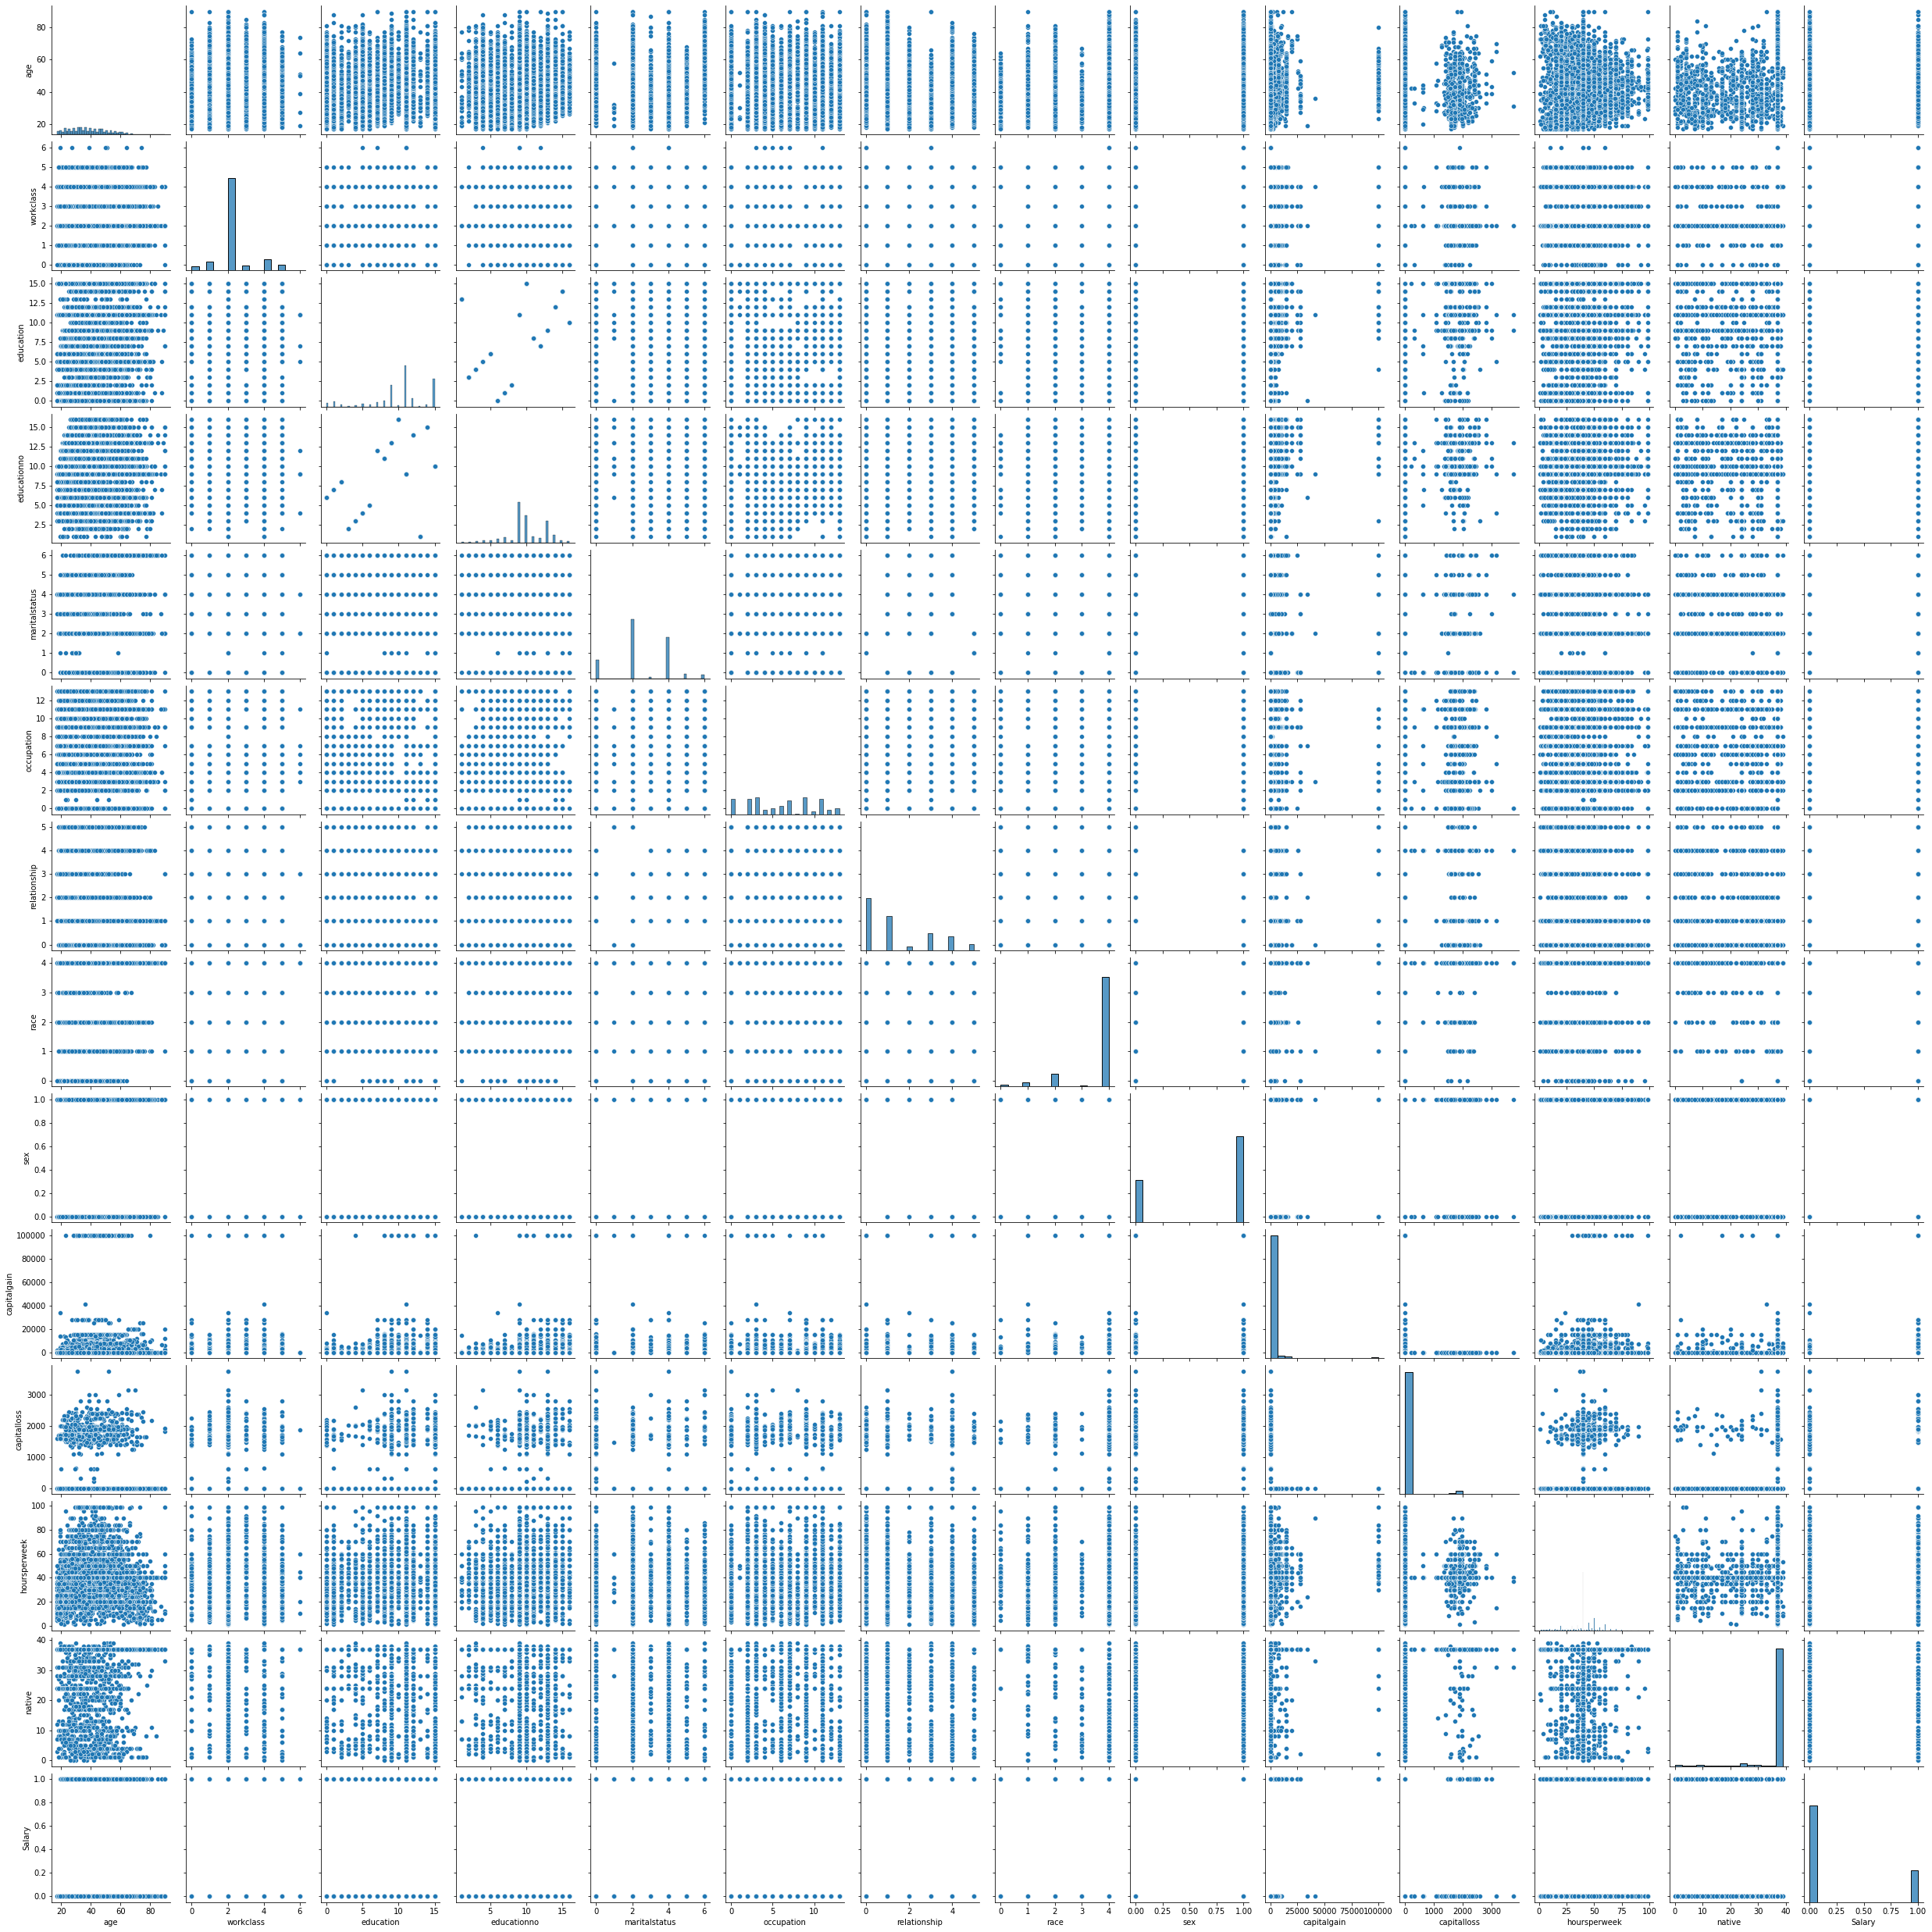

In [31]:
# Preparing Pairplot
sns.pairplot(salary_test)

In [32]:
# Finding correlation between the variables

In [33]:
salary_test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.092686,-0.004167,0.021979,-0.245822,-0.003881,-0.241180,0.035180,0.075150,0.076765,0.053172,0.088090,0.001787,0.216703
workclass,0.092686,1.000000,0.021149,0.047708,-0.030821,0.020147,-0.063257,0.064707,0.062290,0.031858,0.007808,0.051189,-0.000432,0.011495
education,-0.004167,0.021149,1.000000,0.361666,-0.044471,-0.017227,-0.013293,0.007635,-0.027574,0.030424,0.024271,0.064155,0.075685,0.092476
educationno,0.021979,0.047708,0.361666,1.000000,-0.070693,0.093437,-0.080444,0.030924,0.000603,0.132346,0.085651,0.127779,0.099699,0.326777
maritalstatus,-0.245822,-0.030821,-0.044471,-0.070693,1.000000,-0.001040,0.172341,-0.076084,-0.114448,-0.042549,-0.033647,-0.165199,-0.017963,-0.185870
occupation,-0.003881,0.020147,-0.017227,0.093437,-0.001040,1.000000,-0.054695,0.004326,0.050982,0.011623,0.012946,0.014548,0.003006,0.046633
relationship,-0.241180,-0.063257,-0.013293,-0.080444,0.172341,-0.054695,1.000000,-0.119236,-0.580247,-0.056609,-0.051241,-0.257082,0.003405,-0.254418
race,0.035180,0.064707,0.007635,0.030924,-0.076084,0.004326,-0.119236,1.000000,0.087171,0.016730,0.020725,0.041720,0.120543,0.073101
sex,0.075150,0.062290,-0.027574,0.000603,-0.114448,0.050982,-0.580247,0.087171,1.000000,0.047180,0.048382,0.227884,-0.017165,0.212100
capitalgain,0.076765,0.031858,0.030424,0.132346,-0.042549,0.011623,-0.056609,0.016730,0.047180,1.000000,-0.033929,0.089512,0.008189,0.225871


In [34]:
# Now, splitting the variables into dependent and independent variables

In [35]:
x = salary_train.iloc[:,0:13]
y = salary_train.iloc[:,13]

In [36]:
x_train = salary_train.iloc[:,0:13]
y_train = salary_train.iloc[:,13]
x_test = salary_test.iloc[:,0:13]
y_test = salary_test.iloc[:,13]



In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [38]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((18832, 13), (8071, 13), (18832,), (8071,))

In [39]:
# Applying grid search CV to find the best Grid Search method

Grid Search CV

We apply each and every method seperately as the data is too big 
to calculate at the same time.

In [40]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [41]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

Linear Method

In [42]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8049807954404659


Poly method

In [43]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8442572171973733


RBF Method

In [44]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8426465122041878


Sigmoid Method

In [45]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.6999132697311362


Conclusion:

From the above Grid Search CV methods, we find that Poly method gives us 
the highest accuracy.

So, the best method for this dataset to predict the model is **'Poly'**  method.